In [15]:
# conventional way to import pandas and numpy
import pandas as pd
import numpy as np

In [23]:
# reading CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv(r'C:\Users\SAGNIK CHAKRABORTY\Downloads\Projects\Advertising.csv',index_col=0)

# displaying the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# displaying the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# checking the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

What are the features here?

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
    
Radio: advertising dollars spent on Radio
    
Newspaper: advertising dollars spent on Newspaper
    
What is the response?
Sales: sales of a single product in a given market (in thousands of items)

# Visualizing data using seaborn

In [7]:
# conventional way to import seaborn
import seaborn as sns

# allowing plots to appear within the notebook
%matplotlib inline

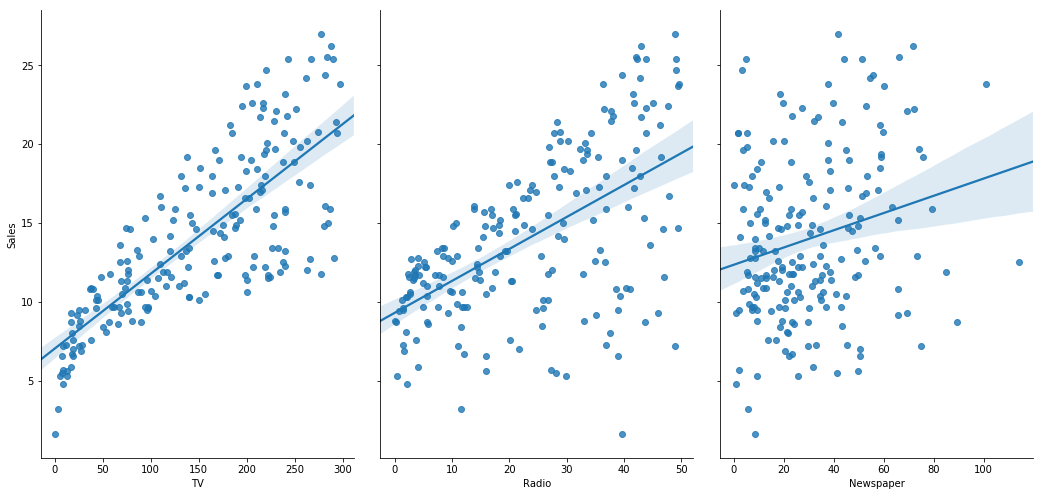

In [9]:
# visualizing the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

In [10]:
#Splitting the Data
X=data.iloc[:,[0,1,2]].values
y=data.iloc[:,3].values

# Splitting X and y into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


# Linear regression in scikit-learn

In [19]:
# importing model
from sklearn.linear_model import LinearRegression

# instantiating
linreg = LinearRegression()

# fitting the model to the training data (in this case or model is learning the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# printing the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.876966622317928
[0.04656457 0.17915812 0.00345046]


In [21]:
# making predictions on the testing set
y_pred = linreg.predict(X_test)

# Now We need an evaluation metric in order to compare our predictions with the actual values!

In [25]:
# Computing the RMSE for our Sales predictions
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.404651423032895

# Feature selection
Let's remove the 'Newspaper' column from the model and check the RMSE!

In [27]:
#Splitting the Data
X=data.iloc[:,[0,1]].values
y=data.iloc[:,3].values

# spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fitting the model to the training data
linreg.fit(X_train, y_train)

# makeing predictions on the testing set
y_pred = linreg.predict(X_test)

# compute\ing the RMSE of our predictions
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.3879034699382886

The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.